<a href="https://colab.research.google.com/github/jahelsantiago/Sings-language-CNN/blob/master/Sings_laguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import csv
import pandas as pd 
import numpy as np
import tensorflow as tf
import seaborn as sns
from google.colab import files
from tensorflow import keras as k

In [3]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv


Primero extraemos los datos del archivo csv y los dividimos en los respectivos train y test, para ello usaremos la funcion  [**read_csv** ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) de pandas para generar un data frame a partir de estos 

In [6]:
df_train = pd.read_csv("/content/sign_mnist_train.csv") #creamos un data frame con el train
df_test = pd.read_csv("/content/sign_mnist_test.csv") #creamos un data frame con el test 

examinamos los datos, y podemos ver que la primera columna corresponde al label de la imagen (0-25) y las demas a los 784 pixeles de las imagenes (25x25)

In [7]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


creamos una funcion que lea un data frame, extraiga los label e imagenes en formato numpy array, para ello se usara la funcion [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) de pandas y la funcion [to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html)

In [51]:
def split_images(df_data):
  labels = df_data.iloc[:,0].to_numpy() #get the lables an cast to numpy array
  images = [df_train.iloc[i,1:].to_numpy().reshape(28,28) for i in range(len(df_data))] #get all the images in a numpy array of shape (28,28,1)
  return labels, images 

In [52]:
train_labels, train_images = split_images(df_train)
test_labels, test_images = split_images(df_test)

imprimimos algunas imagenes para ver mejor el data set 

<Figure size 432x288 with 0 Axes>

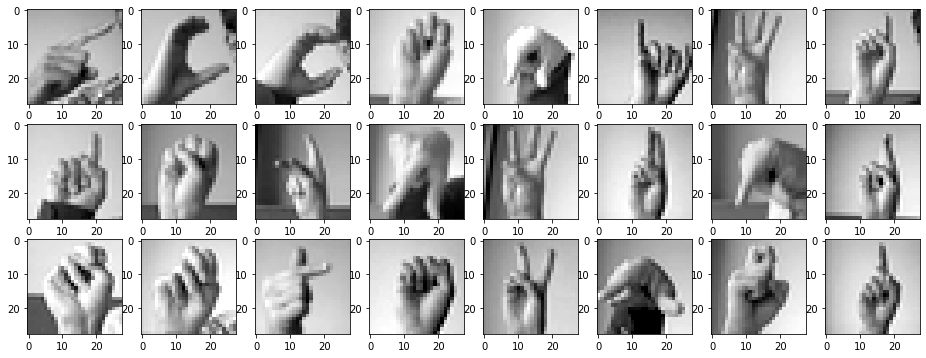

In [53]:
columns = 8
rows = 3
plt.gray()
fig=plt.figure(figsize=(columns*2, rows*2))
for i in range(1, columns*rows +1):
    img = train_images[i]
    fig.add_subplot(rows, columns, i)    
    plt.imshow(img)
plt.show()

In [68]:
train_images = np.array(train_images).reshape(-1,28,28,1).shape
test_images = np.array(test_images).reshape(-1,28,28,1).shape

(27455, 28, 28, 1)

preprosesamos las imagenes y hacemos data augmentation

In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    rescale = 1./255      
)

test_datagen = train_datagen = ImageDataGenerator(
    rescale = 1./255      
)



definimos el modelo

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D((2,2),2),
    tf.keras.layers.Conv2D(32,(3,3)),
    tf.keras.layers.MaxPool2D((2,2),2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= "relu"),
    tf.keras.layers.Dense(25, activation="softmax")                                             
])

